# 1. Texts Classification

In [1]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
del calm['ID'], frust['ID']
keys = calm.columns
calm, frust = calm.values, frust.values

In [2]:
y = np.hstack((np.zeros(calm.shape[0]), np.ones(frust.shape[0])))
data = np.vstack((calm, frust))
from sklearn.preprocessing import scale
data = scale(data)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(penalty = 'l1', C = 0.1).fit(data,y)
accuracy_score(y, clf.predict(data))

/home/ased/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7920792079207921

In [4]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True, max_features = 10)
main_keys = np.argwhere(model.get_support())
main_keys = [i[0] for i in main_keys]
print(len(main_keys), keys[main_keys])
main_keys_learn = main_keys

10 Index(['Тональность слов (по округленным значениям)',
       'Число отрицательных приставок и форм (не,ни,бес,без) / Число слов',
       'Словарь: Инвективы', 'Сем. роль: деструктив', 'Сем. роль: каузатив',
       'Сем. роль: квантитатив', 'Сем. роль: ликвидатив',
       'Сем. роль: предм_пот_мод_оценки', 'Сем. связь: DES',
       'Сем. связь: PTN'],
      dtype='object')


# 2. Differences Clustering Through Modificated Signum

In [22]:
import numpy as np
def smooth_signum(delta, eps = 0.2):
    return np.where(abs(delta)<=eps, 0, 1*np.sign(delta))

In [23]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
#keys = [i for i in calm.columns if 'Тональность' in i] + ['ID']
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm.values, frust.values
from sklearn.preprocessing import scale,  MaxAbsScaler
delta = (frust-calm)
scaled_delta = MaxAbsScaler().fit_transform(delta)
delta = smooth_signum(scaled_delta)

In [24]:
folder_results = 'Signum/'

## Clustering

0 48
1 53


<IPython.core.display.Javascript object>


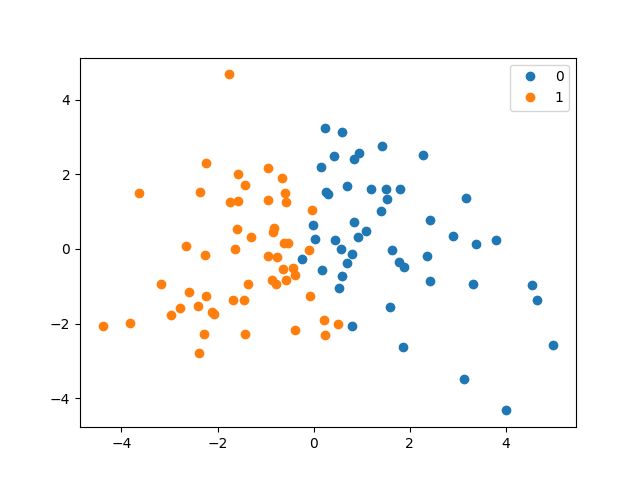

In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
delta_ = PCA(2).fit_transform(delta)
y = KMeans(n_clusters=2, n_init = 1000).fit_predict(PCA(10).fit_transform(delta))

import matplotlib.pylab as plt
%matplotlib notebook
classes = [i for i in range(min(y), max(y)+1)]
D = list()
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    print(y_, len(delta_1))
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(scaled_delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]].mean(axis = 0))
    plt.plot(delta_1[:,0], delta_1[:,1], 'o')
plt.legend(classes)
plt.savefig('Images/' + folder_results +'Cluster.pdf')

## The Most Different Features

<IPython.core.display.Javascript object>


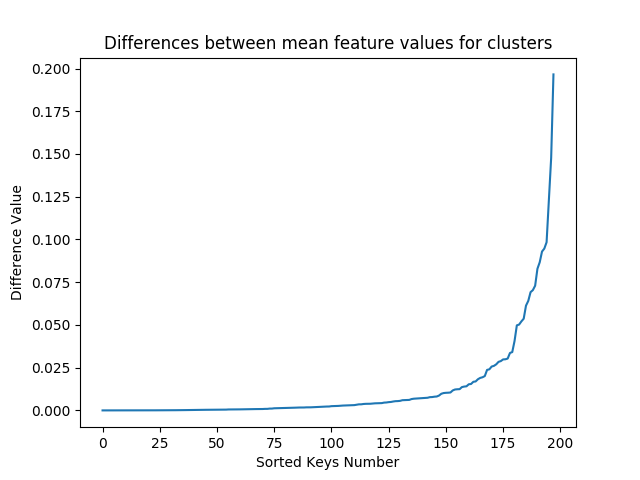

Text(0, 0.5, 'Difference Value')

In [27]:
cluster_delta = list(np.absolute(D[0]- D[1])**2)
cluster_delta = [(i, ind) for ind, i in enumerate(cluster_delta)]
cluster_delta.sort(key = lambda x: x[0])
import matplotlib.pyplot as plt
% matplotlib notebook
plt.plot([i for i in range(len(keys))], [i[0] for i in cluster_delta])
plt.title('Differences between mean feature values for clusters')
plt.xlabel('Sorted Keys Number')
plt.ylabel('Difference Value')

In [28]:
m = 0.7*max(np.absolute(D[0]- D[1])**2)
main_keys = [i[1] for i in cluster_delta if i[0] > m]
ind = 0
print('Number of Main Keys',len(main_keys))
for ind in main_keys:
    print(keys[ind])

Number of Main Keys 2
Коэффициент Трейгера
Коэффициент опредмеченности действия (кол. глаголов / кол. существительных)


In [29]:
def f(delta_, delta, n = 11):
    M, m = delta.max(axis = 0), delta.min(axis = 0)
    res = dict()
    for i in range(delta_.shape[1]):
        x = np.linspace(-1, 1, n)
        res[i] = (delta_[:, i], x)
    return res
D = list()
for y_ in classes:
    delta_1 = scaled_delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(f(delta_1, scaled_delta))
ind = 0

0 Коэффициент Трейгера


<IPython.core.display.Javascript object>


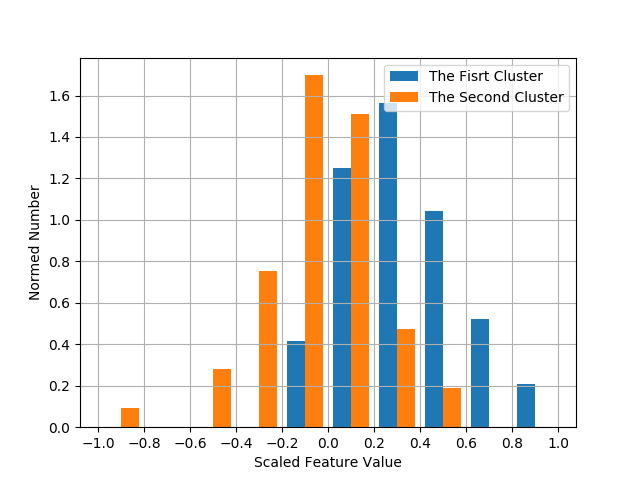

In [30]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.xticks(list(np.linspace(-1, 1, 11)))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

1 Коэффициент опредмеченности действия (кол. глаголов / кол. существительных)


<IPython.core.display.Javascript object>


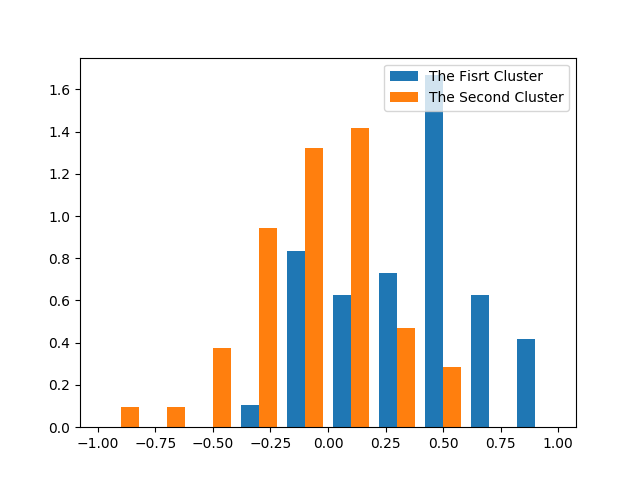

In [31]:
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

# 3. Differences Clustering Through Sigmoid : Clusters Number

In [32]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm[keys].values, frust[keys].values
from sklearn.preprocessing import scale, MaxAbsScaler
delta = (frust-calm)
scaled_delta = MaxAbsScaler().fit_transform(delta)
delta = smooth_signum(scaled_delta, eps = 0.2)

In [5]:
# Score Function
def d(x):
    return np.linalg.norm(x, 2)/x.shape[0]
def bcd(X, y):
    classes = [i for i in range(min(y), max(y)+1)]
    c_X = X.mean(axis = 0)
    s = 0
    for y_ in classes:
        X_i = np.array([i for ind, i in enumerate(X) if y[ind]==y_])
        c_i = X_i.mean(axis=0)
        s += d(c_i - c_X)*X_i.shape[0]
    return s/(len(classes)*np.sqrt(X_i.shape[0]))
def wcd(X, y):
    classes = [i for i in range(min(y), max(y)+1)]
    s = 0
    for y_ in classes:
        X_i = np.array([i for ind, i in enumerate(X) if y[ind]==y_])
        c_i = X_i.mean(axis=0)
        s += sum([d(i-c_i) for i in X_i])/X_i.shape[0]
    return s
def SF(X,y):
    return 1 - 1/np.exp(np.exp(bcd(X,y) - wcd(X,y)))

In [6]:
from sklearn.decomposition import PCA
delta_ = PCA(10).fit_transform(delta)

In [7]:
from sklearn.cluster import KMeans
gen = range(1, 10)
res_y  = list()
for i in gen:
    y = KMeans(n_clusters=i, n_init = 100000).fit_predict(delta_)
    res_y.append(y)

In [8]:
res =  list()
for y in res_y:
    res.append(SF(delta_, y))

<IPython.core.display.Javascript object>


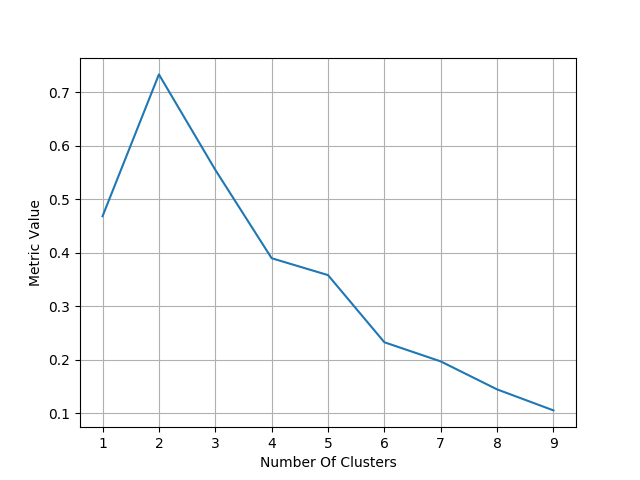

In [9]:
import matplotlib.pylab as plt
%matplotlib notebook
plt.plot([i for i in gen], res)
plt.grid()
plt.xlabel('Number Of Clusters')
plt.ylabel('Metric Value')
plt.savefig('Images/clusters_number.pdf')

# 4. Differences Clustering Through Sigmoid : Many Clusters

In [33]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
#keys = [i for i in calm.columns if 'Тональность' in i] + ['ID']
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm.values, frust.values
from sklearn.preprocessing import scale, MaxAbsScaler
delta = (frust-calm)
scaled_delta = MaxAbsScaler().fit_transform(delta)
delta = smooth_signum(scaled_delta, eps = 0.2)

In [34]:
folder_results = "ManyClusters"

## Clustering

0 19
1 40
2 24
3 18


<IPython.core.display.Javascript object>


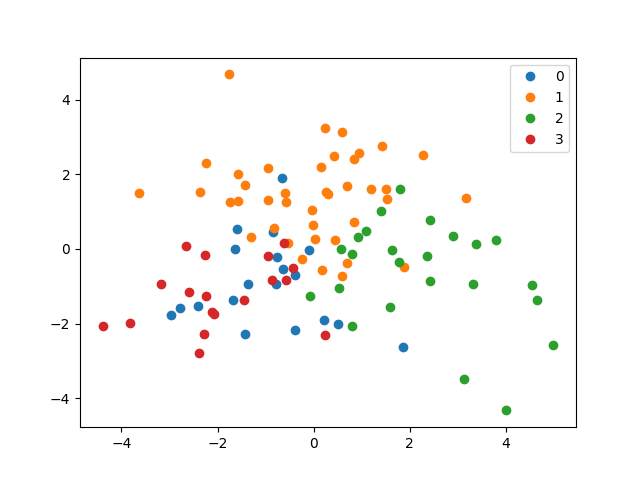

In [35]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
delta_ = PCA(2).fit_transform(delta)
y = KMeans(n_clusters=4, n_init = 1000).fit_predict(PCA(10).fit_transform(delta))
import matplotlib.pylab as plt
%matplotlib notebook
classes = [i for i in range(min(y), max(y)+1)]
D = list()
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    print(y_, len(delta_1))
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]].mean(axis = 0))
    plt.plot(delta_1[:,0], delta_1[:,1], 'o')
plt.legend(classes)
plt.savefig('Images/' + folder_results +'Cluster.pdf')

<IPython.core.display.Javascript object>


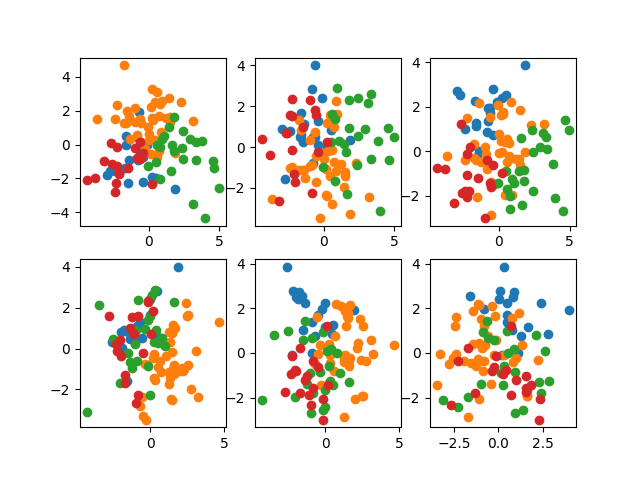

In [36]:
fig, axs = plt.subplots(2, 3)
_ = list()
for i in axs:
    _ += list(i)
axs = _
delta_ = PCA(4).fit_transform(delta)
axes = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]
for ind,ax in enumerate(axs):
    for y_ in classes:
        delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
        i, j = axes[ind]
        ax.plot(delta_1[:,i], delta_1[:,j], 'o')
plt.savefig('Images/' + folder_results +'Cluster_.pdf')

## The Most Different Features

<IPython.core.display.Javascript object>


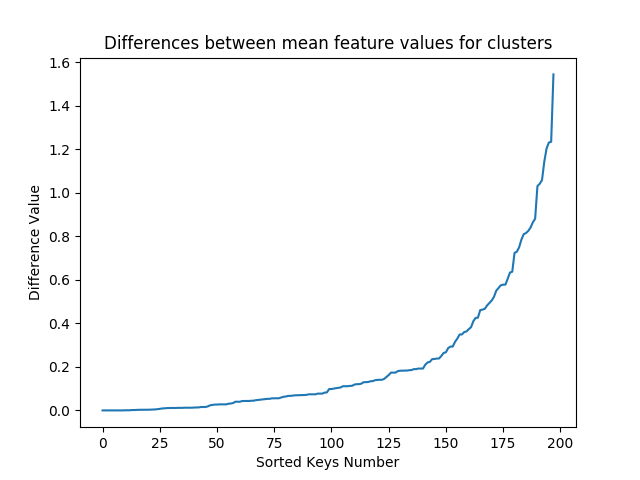

Text(0, 0.5, 'Difference Value')

In [37]:
def get_max(D):
    res = list()
    for i in D:
        for j in D:
            res.append((i-j)**2)
    res = np.array(res)
    return res.max(axis = 0)
cluster_delta = get_max(D)
cluster_delta = [(i, ind) for ind, i in enumerate(cluster_delta)]
cluster_delta.sort(key = lambda x: x[0])
import matplotlib.pyplot as plt
% matplotlib notebook
plt.plot([i for i in range(len(keys))], [i[0] for i in cluster_delta])
plt.title('Differences between mean feature values for clusters')
plt.xlabel('Sorted Keys Number')
plt.ylabel('Difference Value')

In [38]:
m = 0.6*max([i[0] for i in cluster_delta])
main_keys = [i[1] for i in cluster_delta if i[0] > m]
ind = 0
print('Number of Main Keys',len(main_keys))
keys[main_keys]

Number of Main Keys 8


Index(['Доля глаголов 1 лица', 'Сем. связь: QNT', 'Сем. роль: адресат',
       'Число знаков пунктуации / Число слов',
       'Средняя длина слов (в количестве символов)',
       'Доля глаголов прошедшего времени, первого лица, единственного числа',
       'Коэффициент Трейгера',
       'Словарь: Лексика положительной рациональной оценки и ментальных действий'],
      dtype='object')

In [39]:
def f(delta_, delta, n = 11):
    M, m = delta.max(axis = 0), delta.min(axis = 0)
    res = dict()
    for i in range(delta_.shape[1]):
        x = np.linspace(-1, 1, n)
        res[i] = (delta_[:, i], x)
    return res
D = list()
for y_ in classes:
    delta_1 = scaled_delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(f(delta_1, frust-calm))
ind = 0

0 Доля глаголов 1 лица


<IPython.core.display.Javascript object>


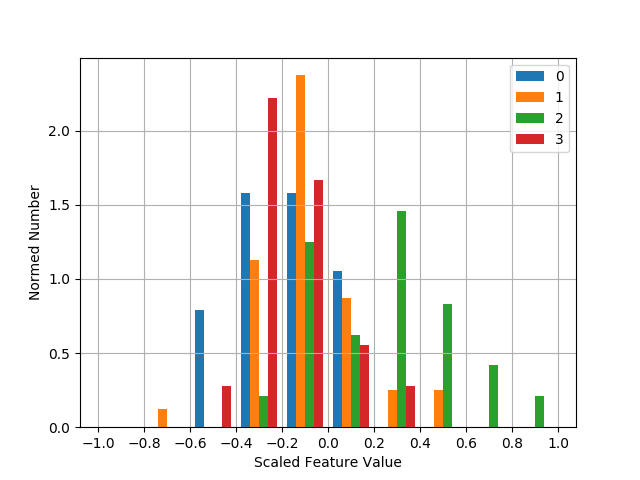

In [40]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

1 Сем. связь: QNT


<IPython.core.display.Javascript object>


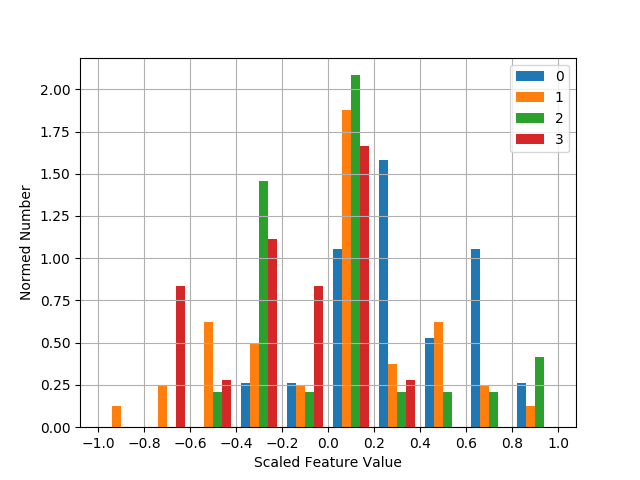

In [41]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

2 Сем. роль: адресат


<IPython.core.display.Javascript object>


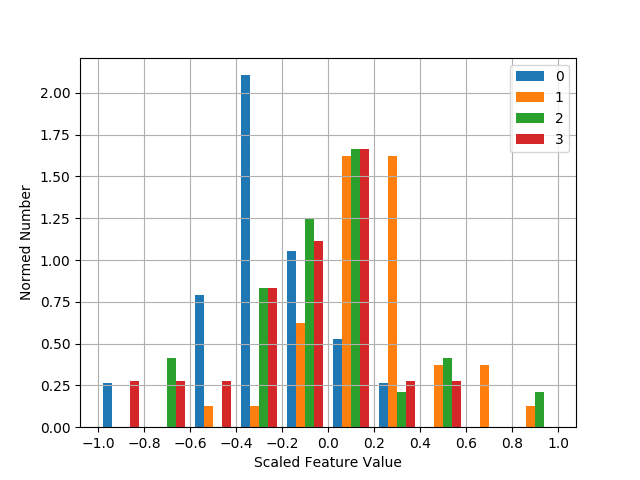

In [42]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

3 Число знаков пунктуации / Число слов


<IPython.core.display.Javascript object>


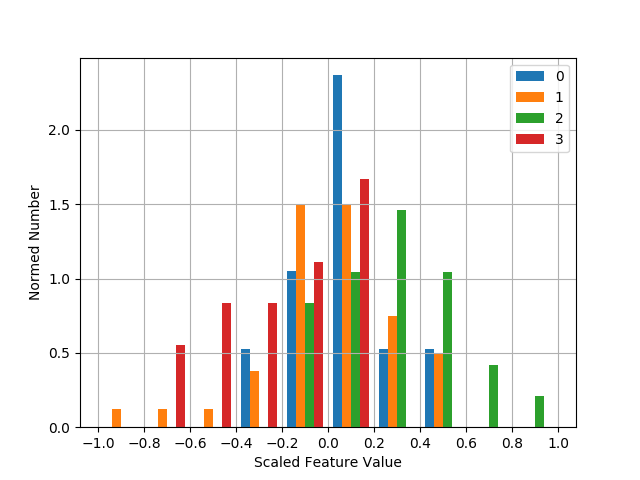

In [43]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

4 Средняя длина слов (в количестве символов)


<IPython.core.display.Javascript object>


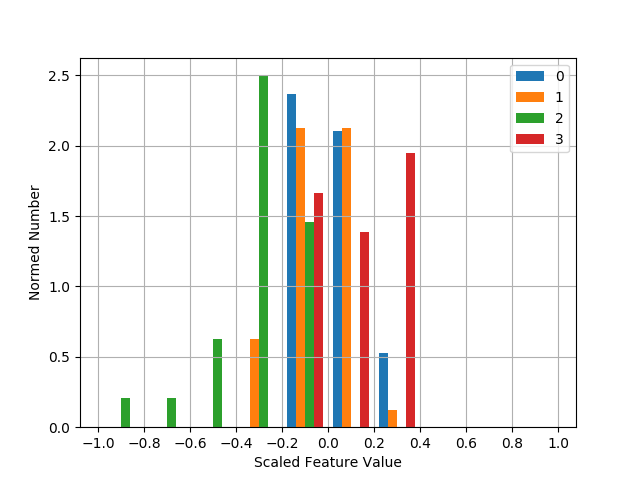

In [44]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

5 Доля глаголов прошедшего времени, первого лица, единственного числа


<IPython.core.display.Javascript object>


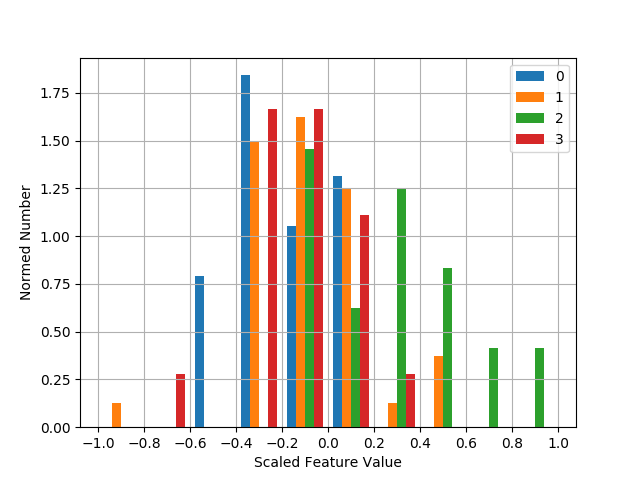

In [45]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

6 Коэффициент Трейгера


<IPython.core.display.Javascript object>


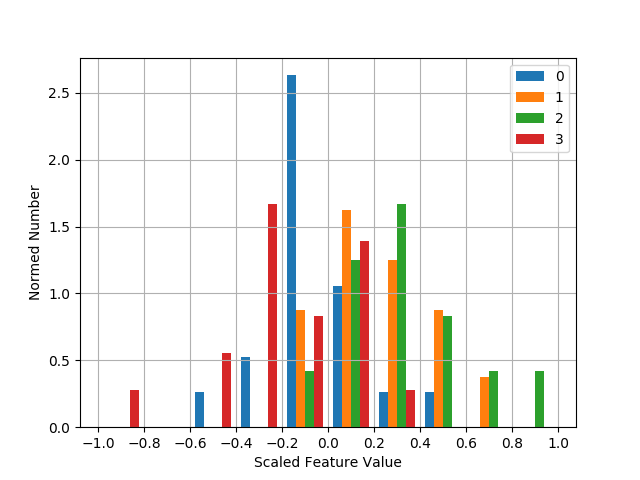

In [46]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

7 Словарь: Лексика положительной рациональной оценки и ментальных действий


<IPython.core.display.Javascript object>


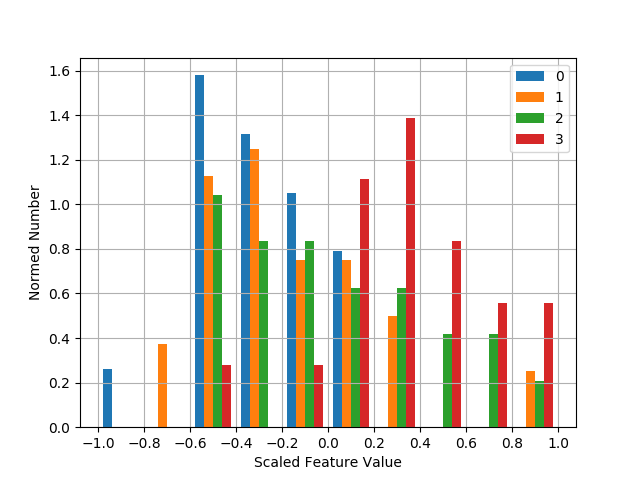

In [47]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')